In [114]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
#%matplolib notebook

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [115]:
h = 1
sd = 1
n = 50

def gen_data(n, h, sd1, sd2):

    x1 = ss.norm.rvs(-h, sd1, n)
    y1 = ss.norm.rvs(0, sd1, n)

    x2 = ss.norm.rvs(h, sd2, n)
    y2 = ss.norm.rvs(0, sd2, n)
    
    return (x1, y1, x2, y2)

In [116]:
#(x1, y1, x2, y2) = gen_data(50, 1, 1, 1.5)

In [117]:
(x1,y1, x2, y2) = gen_data(1000,1.5, 1, 1.5)

In [118]:
def plot_data(x1, y1, x2, y2):
    plt.figure()
    plt.plot(x1, y1, "o", ms=2)
    plt.plot(x2, y2, "o", ms=2)
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')

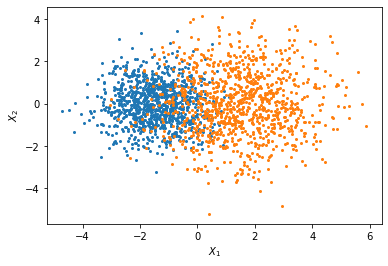

In [119]:
plot_data(x1, y1, x2, y2)

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
clf = LogisticRegression()

In [122]:
np.vstack((x1,y1)).T.shape

(1000, 2)

In [123]:
X = np.vstack((np.vstack((x1,y1)).T,  np.vstack((x2,y2)).T))
X

array([[-1.42123003,  0.17827617],
       [-0.35361557,  0.34254826],
       [-1.00402159, -0.51475137],
       ...,
       [ 3.24327258, -0.55063402],
       [ 2.09276991, -2.37444273],
       [ 2.28804018, -0.13622845]])

In [124]:
X.shape

(2000, 2)

In [125]:
# class 1 and class 2
n = 1000
y = np.hstack((np.repeat(1,n) , np.repeat(2,n)))
y.shape

(2000,)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)
X_train.shape

(1000, 2)

In [127]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
clf.score(X_test, y_test)

0.9

In [129]:
clf.predict_proba(np.array([-2, 0]).reshape(1,-1))

array([[0.97005859, 0.02994141]])

In [130]:
clf.predict(np.array([-2, 0]).reshape(1,-1))

array([1])

In [131]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

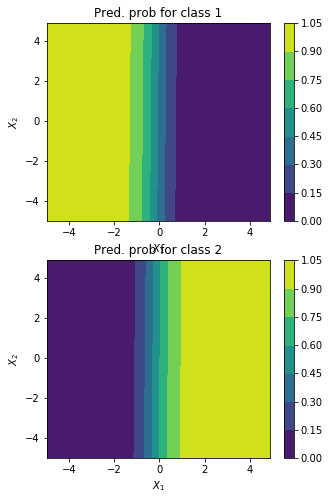

In [132]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");